## 导入鸢尾花数据集

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

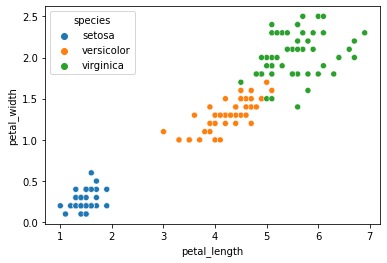

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 大家不用在意这个域名
df = pd.read_csv('https://blog.caiyongji.com/assets/iris.csv')
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

## K-Means训练数据

移除数据标签，仅使用花瓣长、宽作为数据输入，并使用无监督学习方法K-Means进行训练。

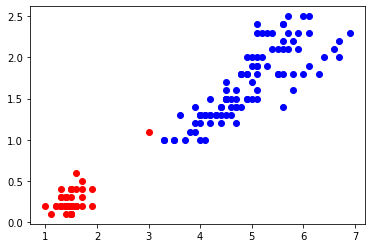

In [2]:
X = df[['petal_length','petal_width']].to_numpy() 

from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "ro", label="group 1")
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "bo", label="group 0")
# plt.legend(loc=2)
plt.show()

得到分类数据如上，我们并不知道下方数据类别分别代表什么意义。

## K的选择

### 惯性指标（inertia）

K-Means的惯性计算方式是，每个样本与最接近的集群中心点的均方距离的总和。

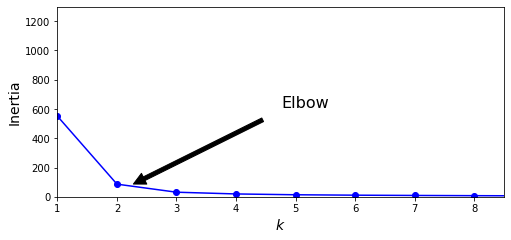

In [3]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

以上代码中model.inertia_即K-Means方法中的惯性指标。

一般地，惯性越小模型越好，但伴随K值的增大，惯性下降的速度变的很慢，因此我们选择“肘部”的K值，作为最优的K值选择。

### 轮廓系数指标（silhouette）

K-Means的轮廓系数计算方式是，与集群内其他样本的平均距离记为a，与外部集群样本的平均距离记为b，轮廓系数(b-a)/max(a,b)。

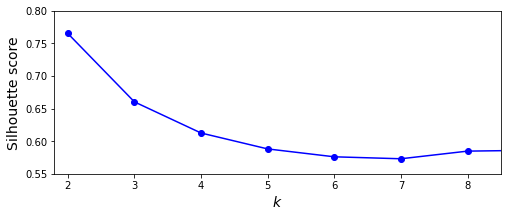

In [4]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.8])
plt.show()


以上代码中silhouette_score方法可取得K-Means的轮廓系数值。

一般地，轮廓系数指标越大越好，我们可以看到当K为2、3时均可取得不错的聚类效果。

## 自动选择K值（拓展）

### 简单理解贝叶斯定理

白话解释贝叶斯：当有新的证据出现时，不确定的事情更加确信了。 这里的“确信”是指对不确定的事情的信心程度。

其中，P(A) 表示事件A发生的概率，P(A|B)表示事件B发生时事件A发生的概率。上面的公式中B就是所谓的证据。这里要注意的是，P(B)的出现让P(A|B)变的更确定了，并不是说概率变高了或者变低了。概率的高或者低都是一种确定。它是一种信心程度的体现。
### 贝叶斯高斯混合模型

使用BayesianGaussianMixture方法，而无需指定明确的K值。

In [5]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
y_pred = bgm.fit_predict(X)
np.round(bgm.weights_, 2)

array([0.41, 0.33, 0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

以上代码的执行逻辑是，初始化10个集群，不断调整有关集群数贝叶斯先验知识，来将不必要的集群权重设为0（或接近0），来确定最终K值。